# Data access client

### Dependencies

In [12]:
# Set project directory
import os
import sys


def project_dir():
    notebook_path = %pwd
    repo_name = "/worldbank_data_exploration/"
    repo_folder = notebook_path.split(repo_name)[0]
    return os.path.join(repo_folder, repo_name[1:])


pwd = os.getenv("PWD", project_dir())
os.environ["PWD"] = pwd
sys.path.append(pwd)

In [13]:
from data_sources.get import get_indicators

### Data access

Retrieving multiple indicators:

In [3]:
df = get_indicators(
    ["SP.POP.TOTL", "FP.CPI.TOTL.ZG", "GC.DOD.TOTL.GD.ZS"], overwrite=True
)
df.head

<bound method NDFrame.head of      Country Name Country Code                             Indicator Name  \
0           Aruba          ABW                          Population, total   
1           Aruba          ABW                          Population, total   
2           Aruba          ABW                          Population, total   
3           Aruba          ABW                          Population, total   
4           Aruba          ABW                          Population, total   
...           ...          ...                                        ...   
1397       Zambia          ZMB  Central government debt, total (% of GDP)   
1398       Zambia          ZMB  Central government debt, total (% of GDP)   
1399       Zambia          ZMB  Central government debt, total (% of GDP)   
1400       Zambia          ZMB  Central government debt, total (% of GDP)   
1401       Zambia          ZMB  Central government debt, total (% of GDP)   

         Indicator Code  Year         Value  

Indicator dataframe example - plotting population index

/home/maciektr/Programowanie/AGH_Laby/worldbank_data_exploration/venv/lib/python3.8/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/maciektr/Programowanie/AGH_Laby/worldbank_data_exploration/venv/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


<AxesSubplot:xlabel='Year'>

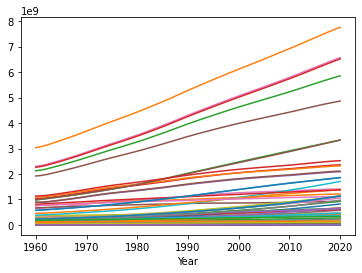

In [4]:
frame = get_indicators(["SP.POP.TOTL"])
frame = frame.drop(columns=["Country Code", "Indicator Code", "Indicator Name"])
frame = frame.pivot(index="Year", values="Value", columns="Country Name")
frame.plot(legend=False)

More complex data query

<AxesSubplot:xlabel='Year'>

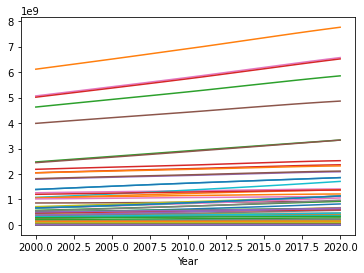

In [5]:
frame = get_indicators(
    ["SP.POP.TOTL"], download_query={"date": "2000:2022"}, overwrite=True
)
frame = frame.drop(columns=["Country Code", "Indicator Code", "Indicator Name"])
frame = frame.pivot(index="Year", values="Value", columns="Country Name")
frame.plot(legend=False)